In [2]:
# Sully Smith, Seymour High School
# This is my cleaned up version of reading the waterbox.pdb file. 
# We use genfromtext to extract data from the mixed ascii / float data file 
# Mentors: Nick Hagerty and Dilip Asthagiri

import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
dtype=[
    ('record','U6'),
    ('atom_id','i4'),
    ('atom_name','U4'),
    ('res_name','U4'),
    ('res_id','i4'),
    ('x','f8'),
    ('y','f8'),
    ('z','f8'),
    ('occupancy','f8'),
    ('temp_factor','f8'),
    ('segment','U6')
]

In [4]:
data = np.genfromtxt(
    open('WaterBox.pdb','r'),
    dtype=dtype,
    autostrip=True
)
#
# Box length given by DA 
#
Boxlength = 24.86 


In [5]:
# Extracting the most important items 
atomname = data['atom_name']
resid  = data['res_id']
xcoord = data['x']
ycoord = data['y']
zcoord = data['z']
natoms = len(atomname)
selected_idx = np.arange(0,natoms,3)
coord = np.transpose(np.array([xcoord,ycoord,zcoord]))
print(np.shape(coord))


(1536, 3)


In [6]:
coord

array([[ 7.202, -0.549, 10.503],
       [ 7.541, -0.426, 11.436],
       [ 7.565,  0.178,  9.92 ],
       ...,
       [ 8.134, -5.881, -4.124],
       [ 8.484, -6.663, -4.638],
       [ 8.187, -6.076, -3.144]], shape=(1536, 3))

In [7]:
# To partition with all bins with positive indices, we will need to move the box by boxlength/2 in all dimensions
#
xcoord = xcoord + Boxlength / 2.0 
ycoord = ycoord + Boxlength / 2.0
zcoord = zcoord + Boxlength / 2.0 
#
# Now we will extract the oxygen atoms using logical indexing
# atomname == "OH2"

In [8]:
# defining bins
x_bins = 3
y_bins = 3
z_bins = 3 
x_max = np.max(xcoord)
y_max = np.max(ycoord)
z_max = np.max(zcoord)
x_min = np.min(xcoord)
y_min = np.min(ycoord)
z_min = np.min(zcoord)
x_dist = (x_max-x_min)/(x_bins)
y_dist = (y_max-y_min)/(y_bins)
z_dist = (z_max-z_min)/(z_bins)
boxes = [[] for i in range(x_bins*y_bins*z_bins)]
def get_box_idx (x,y,z):
	idx= x+y*x_bins+z*(y_bins*x_bins)
	return idx
print(x_dist,y_dist,z_dist)

9.477666666666666 9.521666666666667 9.519


In [9]:
for i in selected_idx:
	# figure out what bin each atom is in
	xbox_local = int((xcoord[i] - x_min)/x_dist)
	ybox_local = int((ycoord[i] - y_min)/y_dist)
	zbox_local = int((zcoord[i] - z_min)/z_dist)
	# print(f'x_box_local={xbox_local}, y_box_local={ybox_local},z_box_local={zbox_local}')
	boxidx = min(get_box_idx(xbox_local,ybox_local,zbox_local), x_bins*y_bins*z_bins-1)
	# print(boxidx) 
	boxes[boxidx].append(i)
# print(boxes)

In [10]:
boxes[0]

[np.int64(3),
 np.int64(24),
 np.int64(144),
 np.int64(162),
 np.int64(174),
 np.int64(234),
 np.int64(252),
 np.int64(288),
 np.int64(348),
 np.int64(519),
 np.int64(540),
 np.int64(543),
 np.int64(720),
 np.int64(807),
 np.int64(852),
 np.int64(1005),
 np.int64(1074),
 np.int64(1143)]

In [11]:
# These indices correspond to positions in your coordinate arrays: xcoord, ycoord, and zcoord.
def euclidean_distance(i, j):
    # This computes the difference in y-coordinates between atom i and atom j.
    dx = xcoord[i] - xcoord[j]
    dy = ycoord[i] - ycoord[j]
    dz = zcoord[i] - zcoord[j]
    # I returned the final distance between atoms i and j.
    return np.sqrt(dx**2 + dy**2 + dz**2)
# This function calculated the straight-line distance between two atoms, based on their coordinates.

In [12]:
pairwise_distances = []

for box in boxes:
	# This loops through each 3D spatial bin (a list of atom indices).
	for i in range(0, len(box), 3):
		# This loops through every atom in the current box using its index in the box list.
		for j in range(i + 3, len(box), 3):  # Avoids duplicates and self-pairs
			idx1 = box[i]
			idx2 = box[j]
			# Gets the actual atom indices from the box.
			dist = euclidean_distance(idx1, idx2)  
			pairwise_distances.append((idx1, idx2, dist))

In [13]:
for pair in pairwise_distances:  # Show first 10 distances
    print(f'Atom {pair[0]} - Atom {1} Distance = {pair[2]:.3f} Å')
    # This is another sanity check to make sure everything is running well
    # We shall see if I did this right

Atom 3 - Atom 1 Distance = 6.492 Å
Atom 3 - Atom 1 Distance = 6.452 Å
Atom 3 - Atom 1 Distance = 3.989 Å
Atom 3 - Atom 1 Distance = 3.044 Å
Atom 3 - Atom 1 Distance = 8.392 Å
Atom 162 - Atom 1 Distance = 4.194 Å
Atom 162 - Atom 1 Distance = 7.573 Å
Atom 162 - Atom 1 Distance = 4.078 Å
Atom 162 - Atom 1 Distance = 4.730 Å
Atom 252 - Atom 1 Distance = 8.413 Å
Atom 252 - Atom 1 Distance = 3.502 Å
Atom 252 - Atom 1 Distance = 8.854 Å
Atom 519 - Atom 1 Distance = 5.601 Å
Atom 519 - Atom 1 Distance = 8.450 Å
Atom 720 - Atom 1 Distance = 7.469 Å
Atom 39 - Atom 1 Distance = 6.226 Å
Atom 39 - Atom 1 Distance = 3.612 Å
Atom 39 - Atom 1 Distance = 10.918 Å
Atom 39 - Atom 1 Distance = 6.940 Å
Atom 39 - Atom 1 Distance = 8.881 Å
Atom 486 - Atom 1 Distance = 4.474 Å
Atom 486 - Atom 1 Distance = 8.429 Å
Atom 486 - Atom 1 Distance = 2.767 Å
Atom 486 - Atom 1 Distance = 7.659 Å
Atom 759 - Atom 1 Distance = 7.502 Å
Atom 759 - Atom 1 Distance = 4.894 Å
Atom 759 - Atom 1 Distance = 5.423 Å
Atom 972 - Atom

In [14]:
print(pairwise_distances[0])
# This is another sanity check to make sure that the parwise distances are working

(np.int64(3), np.int64(162), np.float64(6.492299284537028))


In [15]:
# I am extracting only the distances from the tuple (i, j, dist)
distances = [dist for (_, _, dist) in pairwise_distances]

In [16]:
np.sort(distances)

array([ 2.66397091,  2.6745351 ,  2.69067296,  2.69187333,  2.6936349 ,
        2.70942226,  2.71654302,  2.72306023,  2.72427678,  2.72841932,
        2.72906907,  2.73009707,  2.73134198,  2.74424853,  2.75721037,
        2.75737738,  2.75767982,  2.75839917,  2.760816  ,  2.76242176,
        2.76317734,  2.76579591,  2.76717527,  2.76855558,  2.7732389 ,
        2.77902879,  2.77907934,  2.77922345,  2.77930891,  2.78040932,
        2.78061378,  2.78295185,  2.7858697 ,  2.78658465,  2.78800825,
        2.79268849,  2.79364905,  2.80072098,  2.80081345,  2.80829681,
        2.81373115,  2.83562639,  2.83644725,  2.84418371,  2.86478551,
        2.86822907,  2.88557395,  2.91255283,  2.91831612,  2.97051948,
        2.98568987,  3.02490149,  3.0362322 ,  3.0380706 ,  3.04378531,
        3.07019315,  3.07394893,  3.09727719,  3.10586461,  3.10778217,
        3.14248262,  3.15568915,  3.1671694 ,  3.18792534,  3.19584574,
        3.21620289,  3.23565094,  3.24262008,  3.27984893,  3.29

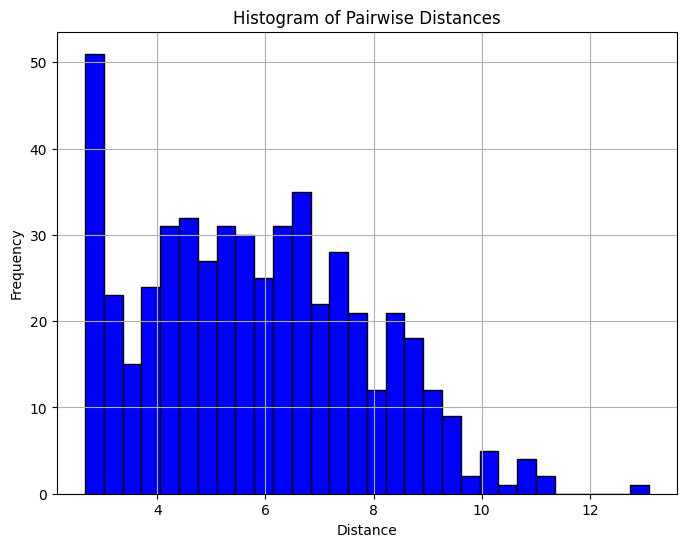

In [17]:
# Now I am ploting the histogram
plt.figure(figsize=(8, 6))
plt.hist(distances, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Pairwise Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
# Writing my own histogramming code 
delr = 0.05 
nbins = int((15.5/delr) + 1)
hist = np.zeros(nbins)
r    = np.zeros(nbins)

for rcurrent in distances:
    if rcurrent < 15.5:
        bin = int(rcurrent / delr) 
        hist[bin] += 1 
#
for i in range(nbins):
    rlow = i * delr 
    rmid = rlow + delr / 2.0 
    r[i] = rmid 


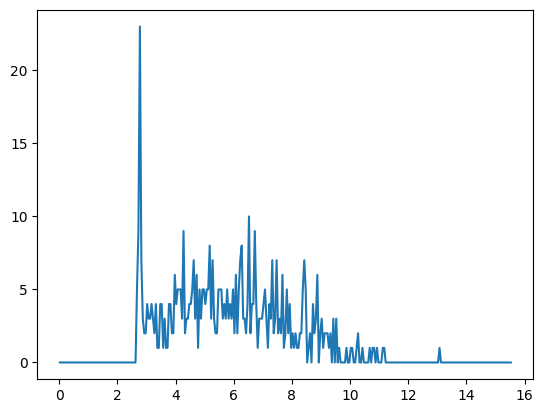

In [19]:
plt.plot(r,hist)